In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# df = pd.read_csv('/content/drive/MyDrive/house_price/train.csv')
df = pd.read_csv('./data/train.csv')

# Ask Basic Question

In [4]:
# How big is the dataset?
df.shape

(1460, 81)

In [5]:
# how does the dataset look?
df.head()
#df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# what is the data type of each column?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# are there any missing values?
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
# how does the data look mathematically?
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
# are there duplicates?
df.duplicated().sum()

np.int64(0)

In [10]:
# how is the correlation between the features?
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [11]:
# function to check for mixed types in a column
def has_mixed_types(col):
    return col.apply(type).nunique() > 1

# Apply it to all columns
mixed_type_columns = df.columns[df.apply(has_mixed_types)]

# Print result
print("Columns with mixed types:")
print(mixed_type_columns.tolist())
print("SUM: ", len(mixed_type_columns))

Columns with mixed types:
['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
SUM:  16


In [12]:
# Loop through mixed-type columns and show type counts + sample values
for col in mixed_type_columns:
    print(f"\n🧪 Column: {col}")

    # Count how many of each data type
    type_counts = df[col].apply(type).value_counts()
    print("🔢 Data types count:")
    print(type_counts)

    # Optional: show example values from each type
    # print("🔍 Example values per type:")
    # for dtype in type_counts.index:
    #     examples = df[col][df[col].apply(lambda x: isinstance(x, dtype))].dropna().unique()[:5]
    #     print(f" - {dtype.__name__}: {examples}")


🧪 Column: Alley
🔢 Data types count:
Alley
<class 'float'>    1369
<class 'str'>        91
Name: count, dtype: int64

🧪 Column: MasVnrType
🔢 Data types count:
MasVnrType
<class 'float'>    872
<class 'str'>      588
Name: count, dtype: int64

🧪 Column: BsmtQual
🔢 Data types count:
BsmtQual
<class 'str'>      1423
<class 'float'>      37
Name: count, dtype: int64

🧪 Column: BsmtCond
🔢 Data types count:
BsmtCond
<class 'str'>      1423
<class 'float'>      37
Name: count, dtype: int64

🧪 Column: BsmtExposure
🔢 Data types count:
BsmtExposure
<class 'str'>      1422
<class 'float'>      38
Name: count, dtype: int64

🧪 Column: BsmtFinType1
🔢 Data types count:
BsmtFinType1
<class 'str'>      1423
<class 'float'>      37
Name: count, dtype: int64

🧪 Column: BsmtFinType2
🔢 Data types count:
BsmtFinType2
<class 'str'>      1422
<class 'float'>      38
Name: count, dtype: int64

🧪 Column: Electrical
🔢 Data types count:
Electrical
<class 'str'>      1459
<class 'float'>       1
Name: count, dtype

# Handling Missing Data

In [13]:
# Show percentage of missing values, sorted descending, top 10
df.isnull().mean().sort_values(ascending=False).head(15) * 100

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageYrBlt      5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtCond         2.534247
dtype: float64

In [14]:
null_columns_count = df.isnull().any().sum()
print(f'The number of columns with null values: {null_columns_count}')

The number of columns with null values: 19


In [15]:
df['PoolArea'].value_counts()

PoolArea
0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: count, dtype: int64

In [16]:
# So in 1460 there are 1456 rows with 0 PoolArea, so I'm sropping the column,
# because it doesn't add any value to the dataset.
# also, droping PoolQC (pool quality) because it is realted to PoolArea
# and has too many missing values.
df = df.drop(columns=['PoolArea', 'PoolQC'])

In [17]:
df.shape

(1460, 79)

In [18]:
df.isnull().mean().sort_values(ascending=False).head(15) * 100

MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageQual       5.547945
GarageType       5.547945
GarageFinish     5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
dtype: float64

In [19]:
# MiscFeature: Miscellaneous feature that are not covered in other categories.
# It has too many missing values and the values are not very informative.
# So I'm dropping it.

# Alley: 93% of total house does not have alley access.
# So I don't think it adds any value to the dataset.

# Fence: 80% of total house does not have fence.
# So I don't think it adds any value to the dataset.

# MasVnrType: 59% of total house does not have masonry veneer.
# So I don't think it adds any value to the dataset.

df = df.drop(columns=['MiscFeature', 'Alley', 'Fence', 'MasVnrType'])

In [20]:
df.shape

(1460, 75)

# Imputing missing value:

choosing how to do it depends on:
- The percentage of missing data
- The importance of the variable
- Whether it's MCAR (Missing Completely At Random), MAR (Missing At Random), or MNAR (Missing Not At Random)
- The type of variable (categorical/numerical)
- How much information you'd lose

### 1. FireplaceQu

In [21]:
df.isnull().mean().sort_values(ascending=False).head(17) * 100

FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageFinish     5.547945
GarageCond       5.547945
GarageQual       5.547945
GarageYrBlt      5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
Electrical       0.068493
LotConfig        0.000000
LandSlope        0.000000
Street           0.000000
dtype: float64

In [22]:
df['FireplaceQu'].apply(type).value_counts()

FireplaceQu
<class 'str'>      770
<class 'float'>    690
Name: count, dtype: int64

In [23]:
# Imputing missing value. the null values in FireplaceQu are replaced with 'None'.
# This is because the null values indicate that there is no fireplace in the house.

df['FireplaceQu'] = df['FireplaceQu'].fillna('None')

In [24]:
df['FireplaceQu'].apply(type).value_counts()

FireplaceQu
<class 'str'>    1460
Name: count, dtype: int64

### 2. LotFrontage

In [25]:
# Step 1: What does LotFrontage mean?
# LotFrontage: Linear feet of street connected to property.
# It is the length of the property that is connected to the street.

In [26]:
missing_LotFrontage_type = df[df['LotFrontage'].isnull()]
print(missing_LotFrontage_type['LotFrontage'].value_counts())

Series([], Name: count, dtype: int64)


In [27]:
#  Step 2: Check Missing Pattern — Is It Missing Randomly?
# Count missing values per neighborhood
df[df['LotFrontage'].isnull()]['Neighborhood'].value_counts()
# so missing values are not random, they are concentrated in certain neighborhoods.

Neighborhood
NAmes      39
Gilbert    30
NWAmes     28
Sawyer     26
CollgCr    24
ClearCr    15
Mitchel    13
Crawfor    10
SawyerW     9
Edwards     8
Timber      8
Somerst     8
NoRidge     8
BrkSide     7
StoneBr     5
OldTown     4
Veenker     4
IDOTRR      3
Blmngtn     3
NPkVill     2
MeadowV     2
SWISU       2
NridgHt     1
Name: count, dtype: int64

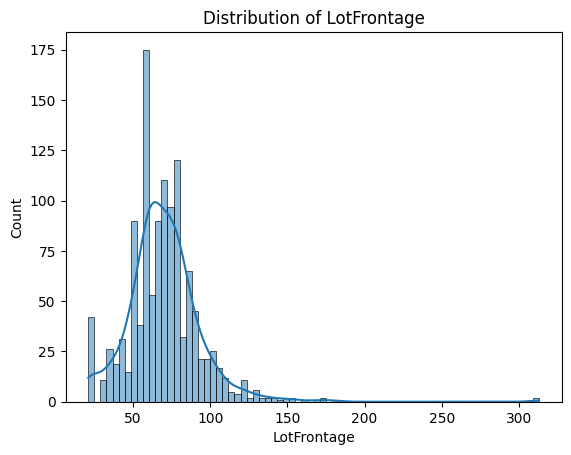

In [28]:
sns.histplot(df['LotFrontage'], kde=True)
plt.title('Distribution of LotFrontage')
plt.show()

# data is not normally distributed, it is skewed to the left.
# so we can use median to fill the missing values.

<Axes: xlabel='LotFrontage', ylabel='SalePrice'>

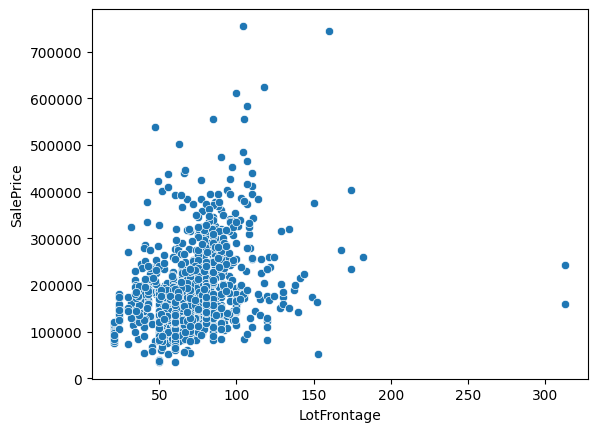

In [29]:
# Step 3: Visualize Relationship with Target Variable
sns.scatterplot(data=df, x='LotFrontage', y='SalePrice')

# so LotFrontage has a limited impact on sale price beyond a certain point

In [30]:
# Step 4: Check Correlation
correlation = df['LotFrontage'].corr(df['SalePrice'])
print(f"Correlation with SalePrice: {correlation}")

Correlation with SalePrice: 0.351799096570678


In [31]:
df[['LotFrontage', 'LotArea', 'GrLivArea', 'SalePrice']].corr()

,LotFrontage,LotArea,GrLivArea,SalePrice
LotFrontage,1.000000,0.426095,0.402797,0.351799
LotArea,0.426095,1.000000,0.263116,0.263843
GrLivArea,0.402797,0.263116,1.000000,0.708624
SalePrice,0.351799,0.263843,0.708624,1.000000


In [33]:
'''
| Reason                                          | Explanation                                  |
| ----------------------------------------------- | -------------------------------------------- |
| ✅ Feature importance is **decent**              | 15% is not negligible — it’s adding signal   |
| ✅ Helps with property size, street access info  | Which affects price                          |
| ✅ Might interact well with other features       | Especially neighborhood or building type     |
| ❌ Dropping it means **losing predictive power** | Even if you can’t recover all missing values |
'''

'\n| Reason                                          | Explanation                                  |\n| ----------------------------------------------- | -------------------------------------------- |\n| ✅ Feature importance is **decent**              | 15% is not negligible — it’s adding signal   |\n| ✅ Helps with property size, street access info  | Which affects price                          |\n| ✅ Might interact well with other features       | Especially neighborhood or building type     |\n| ❌ Dropping it means **losing predictive power** | Even if you can’t recover all missing values |\n'

### 3. GarageType

In [34]:
df.isnull().mean().sort_values(ascending=False).head(17) * 100

GarageType      5.547945
GarageYrBlt     5.547945
GarageCond      5.547945
GarageQual      5.547945
GarageFinish    5.547945
BsmtFinType2    2.602740
BsmtExposure    2.602740
BsmtQual        2.534247
BsmtFinType1    2.534247
BsmtCond        2.534247
MasVnrArea      0.547945
Electrical      0.068493
LandSlope       0.000000
Utilities       0.000000
LotConfig       0.000000
LotShape        0.000000
Street          0.000000
dtype: float64

In [35]:
df['GarageType']

0       Attchd
1       Attchd
2       Attchd
3       Detchd
4       Attchd
         ...  
1455    Attchd
1456    Attchd
1457    Attchd
1458    Attchd
1459    Attchd
Name: GarageType, Length: 1460, dtype: object

In [36]:
# Check if missing GarageType correlates with GarageArea = 0
missing_garage_type = df[df['GarageType'].isnull()]
print(missing_garage_type['GarageArea'].value_counts())
# If many missing GarageType rows have GarageArea = 0, it suggests MNAR (e.g., no garage).

GarageArea
0    81
Name: count, dtype: int64


In [37]:
# imputing missing GarageType values, with None
df['GarageType_NoNull'] = df['GarageType'].fillna('None')
df['GarageType_NoNull']

0       Attchd
1       Attchd
2       Attchd
3       Detchd
4       Attchd
         ...  
1455    Attchd
1456    Attchd
1457    Attchd
1458    Attchd
1459    Attchd
Name: GarageType_NoNull, Length: 1460, dtype: object

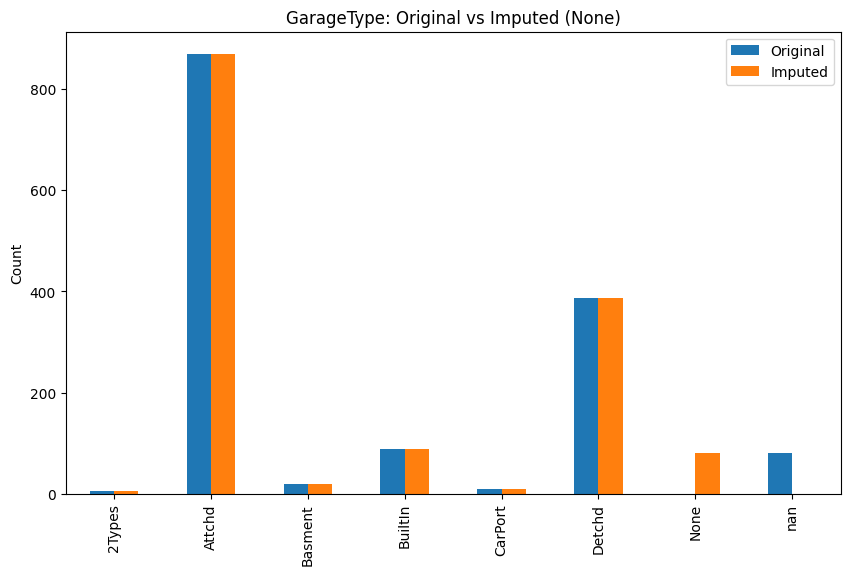

In [38]:
# Compare value counts for original and imputed GarageType
original_counts = df['GarageType'].value_counts(dropna=False)
imputed_counts = df['GarageType_NoNull'].value_counts()

# Combine into a DataFrame for side-by-side comparison
comparison = pd.DataFrame({
    'Original': original_counts,
    'Imputed': imputed_counts
}).fillna(0)

# Plot as bar chart
comparison.plot(kind='bar', figsize=(10, 6))
plt.title('GarageType: Original vs Imputed (None)')
plt.ylabel('Count')
plt.show()

In [39]:
df['GarageType']

0       Attchd
1       Attchd
2       Attchd
3       Detchd
4       Attchd
         ...  
1455    Attchd
1456    Attchd
1457    Attchd
1458    Attchd
1459    Attchd
Name: GarageType, Length: 1460, dtype: object

In [40]:
df = df.drop(columns=['GarageType'])

### 4. GarageYrBlt

In [41]:
df.isnull().mean().sort_values(ascending=False).head(17) * 100

GarageFinish    5.547945
GarageCond      5.547945
GarageQual      5.547945
GarageYrBlt     5.547945
BsmtFinType2    2.602740
BsmtExposure    2.602740
BsmtQual        2.534247
BsmtCond        2.534247
BsmtFinType1    2.534247
MasVnrArea      0.547945
Electrical      0.068493
LandSlope       0.000000
LotConfig       0.000000
Utilities       0.000000
LandContour     0.000000
LotShape        0.000000
Street          0.000000
dtype: float64

In [42]:
correlation = df['GarageYrBlt'].corr(df['SalePrice'])
print(f"Correlation with SalePrice: {correlation}")

Correlation with SalePrice: 0.48636167748786086


In [43]:
df['GarageYrBlt']

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1460, dtype: float64

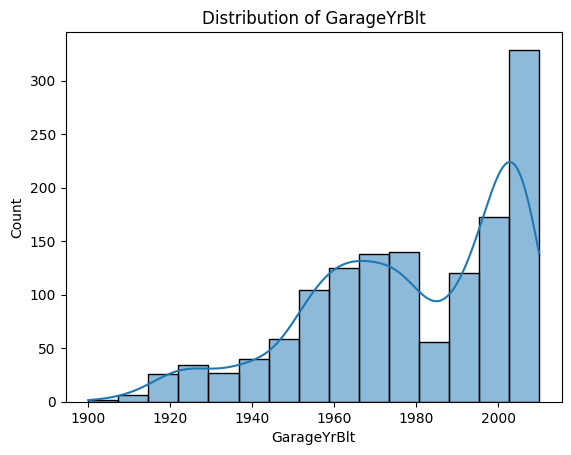

In [44]:
sns.histplot(df['GarageYrBlt'], kde=True)
plt.title('Distribution of GarageYrBlt')
plt.show()

<Axes: xlabel='GarageYrBlt', ylabel='SalePrice'>

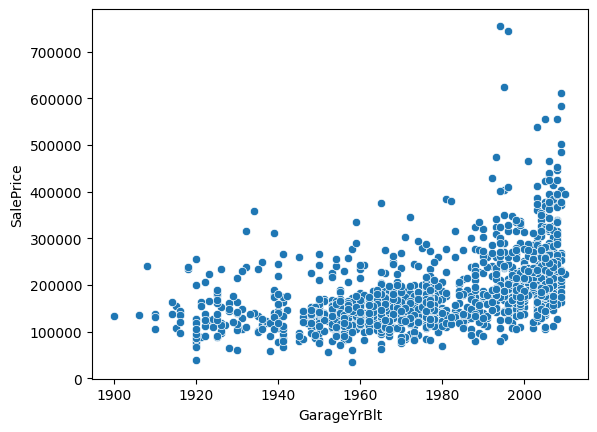

In [45]:
sns.scatterplot(data=df, x='GarageYrBlt', y='SalePrice')

# so here is the thing is, the GarageYrBlt have high impact in saleprice.

In [46]:
mode_GarageYrBlt = df['GarageYrBlt'].mode()[0] # I have to put 0 here. because mode can return multiple values.
# So I'm using the first value of the mode.
df['GarageYrBlt_NoNull'] = df['GarageYrBlt'].fillna(mode_GarageYrBlt)

In [47]:
mean_GarageYrBlt = df['GarageYrBlt'].mean()
df['GarageYrBlt_NoNull2'] = df['GarageYrBlt'].fillna(mean_GarageYrBlt)

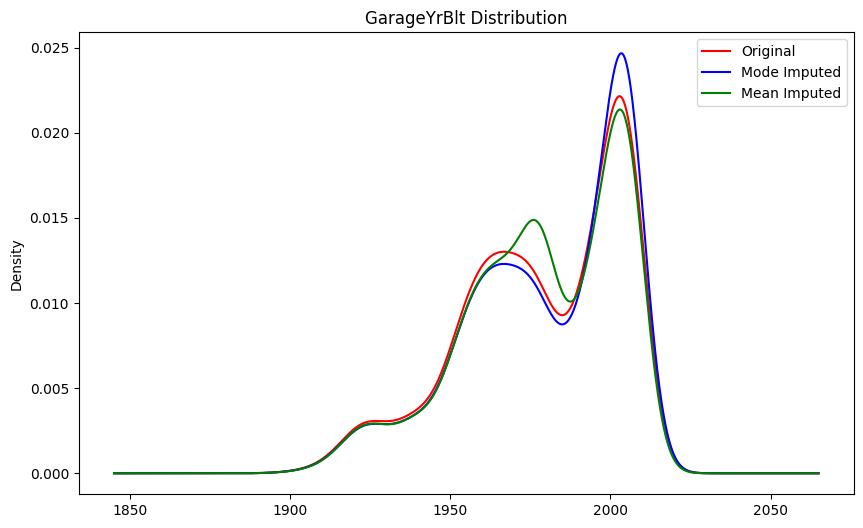

In [48]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
df['GarageYrBlt'].plot(kind = 'kde', ax=ax, label='Original', color = 'red')
df['GarageYrBlt_NoNull'].plot(kind = 'kde', ax=ax, label='Mode Imputed', color = 'blue')
df['GarageYrBlt_NoNull2'].plot(kind = 'kde', ax=ax, label='Mean Imputed', color = 'green')
ax.set_title('GarageYrBlt Distribution')
ax.legend()
plt.show()

In [49]:
# so there the diffrence imputing the missing values with mode is good, but mean is not that good.
# because the mean is affected by outliers, so it is not a good choice for this
df = df.drop(columns=['GarageYrBlt', 'GarageYrBlt_NoNull2'])

### 5. GarageFinish

In [50]:
df.isnull().mean().sort_values(ascending=False).head(17) * 100

GarageFinish    5.547945
GarageCond      5.547945
GarageQual      5.547945
BsmtFinType2    2.602740
BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtQual        2.534247
BsmtCond        2.534247
MasVnrArea      0.547945
Electrical      0.068493
Id              0.000000
LandSlope       0.000000
LotConfig       0.000000
Utilities       0.000000
LandContour     0.000000
LotShape        0.000000
Street          0.000000
dtype: float64

In [51]:
df['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [52]:
df['GarageFinish'] = df['GarageFinish'].fillna('NoGarage')
df['GarageFinish']

0       RFn
1       RFn
2       RFn
3       Unf
4       RFn
       ... 
1455    RFn
1456    Unf
1457    RFn
1458    Unf
1459    Fin
Name: GarageFinish, Length: 1460, dtype: object

In [53]:
df['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', 'NoGarage'], dtype=object)

## 6 GarageQual

In [54]:
df.isnull().mean().sort_values(ascending=False).head(10) * 100

GarageQual      5.547945
GarageCond      5.547945
BsmtFinType2    2.602740
BsmtExposure    2.602740
BsmtQual        2.534247
BsmtCond        2.534247
BsmtFinType1    2.534247
MasVnrArea      0.547945
Electrical      0.068493
MSSubClass      0.000000
dtype: float64

In [55]:
df['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [56]:
df['GarageQual'] = df['GarageQual'].fillna('NoGarage')
df['GarageQual']

0       TA
1       TA
2       TA
3       TA
4       TA
        ..
1455    TA
1456    TA
1457    TA
1458    TA
1459    TA
Name: GarageQual, Length: 1460, dtype: object

In [57]:
df['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', 'NoGarage', 'Ex', 'Po'], dtype=object)

## 7. GarageCond      

In [58]:
df.isnull().mean().sort_values(ascending=False).head(10) * 100

GarageCond      5.547945
BsmtFinType2    2.602740
BsmtExposure    2.602740
BsmtQual        2.534247
BsmtFinType1    2.534247
BsmtCond        2.534247
MasVnrArea      0.547945
Electrical      0.068493
Id              0.000000
MSSubClass      0.000000
dtype: float64

In [59]:
df['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [60]:
df['GarageCond'] = df['GarageCond'].fillna('NoGarage')
df['GarageCond']

0       TA
1       TA
2       TA
3       TA
4       TA
        ..
1455    TA
1456    TA
1457    TA
1458    TA
1459    TA
Name: GarageCond, Length: 1460, dtype: object

In [61]:
df['GarageCond'].unique()

array(['TA', 'Fa', 'NoGarage', 'Gd', 'Po', 'Ex'], dtype=object)

## 8. BsmtFinType2

In [62]:
df.isnull().mean().sort_values(ascending=False).head(10) * 100

BsmtFinType2    2.602740
BsmtExposure    2.602740
BsmtQual        2.534247
BsmtCond        2.534247
BsmtFinType1    2.534247
MasVnrArea      0.547945
Electrical      0.068493
LotFrontage     0.000000
Id              0.000000
MSSubClass      0.000000
dtype: float64

In [63]:
df['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [64]:
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('NoBasement')
df['BsmtFinType2']

0       Unf
1       Unf
2       Unf
3       Unf
4       Unf
       ... 
1455    Unf
1456    Rec
1457    Unf
1458    Rec
1459    LwQ
Name: BsmtFinType2, Length: 1460, dtype: object

In [65]:
df['BsmtFinType2'].unique()

array(['Unf', 'BLQ', 'NoBasement', 'ALQ', 'Rec', 'LwQ', 'GLQ'],
      dtype=object)

## 9. BsmtExposure

In [66]:
df.isnull().mean().sort_values(ascending=False).head(10) * 100

BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtQual        2.534247
BsmtCond        2.534247
MasVnrArea      0.547945
Electrical      0.068493
LotArea         0.000000
LotFrontage     0.000000
Id              0.000000
MSSubClass      0.000000
dtype: float64

In [67]:
df['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [68]:
df['BsmtExposure'] = df['BsmtExposure'].fillna('NoBasement')
df['BsmtExposure']

0       No
1       Gd
2       Mn
3       No
4       Av
        ..
1455    No
1456    No
1457    No
1458    Mn
1459    No
Name: BsmtExposure, Length: 1460, dtype: object

In [69]:
df['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', 'NoBasement'], dtype=object)

## 10. BsmtQual

In [70]:
df.isnull().mean().sort_values(ascending=False).head(9) * 100

BsmtQual        2.534247
BsmtFinType1    2.534247
BsmtCond        2.534247
MasVnrArea      0.547945
Electrical      0.068493
Street          0.000000
LotArea         0.000000
LotFrontage     0.000000
Id              0.000000
dtype: float64

In [71]:
df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [72]:
df['BsmtQual'] = df['BsmtQual'].fillna('NoBasement')
df['BsmtQual']

0       Gd
1       Gd
2       Gd
3       TA
4       Gd
        ..
1455    Gd
1456    Gd
1457    TA
1458    TA
1459    TA
Name: BsmtQual, Length: 1460, dtype: object

In [73]:
df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', 'NoBasement', 'Fa'], dtype=object)

## 11. BsmtFinType1

In [74]:
df.isnull().mean().sort_values(ascending=False).head(8) * 100

BsmtFinType1    2.534247
BsmtCond        2.534247
MasVnrArea      0.547945
Electrical      0.068493
LotArea         0.000000
Street          0.000000
LotShape        0.000000
LotFrontage     0.000000
dtype: float64

In [75]:
df['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [76]:
df['BsmtFinType1'] = df['BsmtQual'].fillna('NoBasement')
df['BsmtQual']

0       Gd
1       Gd
2       Gd
3       TA
4       Gd
        ..
1455    Gd
1456    Gd
1457    TA
1458    TA
1459    TA
Name: BsmtQual, Length: 1460, dtype: object

In [77]:
df['BsmtFinType1'].unique()

array(['Gd', 'TA', 'Ex', 'NoBasement', 'Fa'], dtype=object)

## 12. BsmtCond

In [78]:
df.isnull().mean().sort_values(ascending=False).head(5) * 100

BsmtCond       2.534247
MasVnrArea     0.547945
Electrical     0.068493
LotFrontage    0.000000
LotArea        0.000000
dtype: float64

In [79]:
df['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [80]:
df['BsmtCond'] = df['BsmtCond'].fillna('NoBasement')
df['BsmtCond']

0       TA
1       TA
2       TA
3       Gd
4       TA
        ..
1455    TA
1456    TA
1457    Gd
1458    TA
1459    TA
Name: BsmtCond, Length: 1460, dtype: object

In [81]:
df['BsmtCond'].unique()

array(['TA', 'Gd', 'NoBasement', 'Fa', 'Po'], dtype=object)

## 12. MasVnrArea

In [82]:
df.isnull().mean().sort_values(ascending=False).head(4) * 100

MasVnrArea     0.547945
Electrical     0.068493
Id             0.000000
LotFrontage    0.000000
dtype: float64

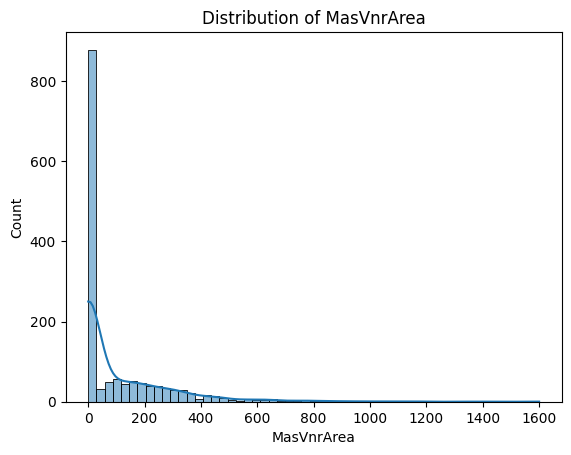

In [83]:
sns.histplot(df['MasVnrArea'], kde=True)
plt.title('Distribution of MasVnrArea')
plt.show()

<Axes: xlabel='MasVnrArea', ylabel='SalePrice'>

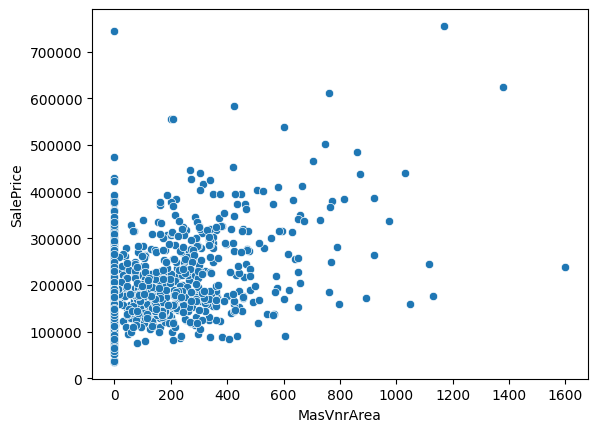

In [84]:
sns.scatterplot(data=df, x='MasVnrArea', y='SalePrice')

In [85]:
df['MasVnrArea'].corr(df['SalePrice'])

np.float64(0.4774930470957155)

In [86]:
# the data distribution is not normal, it is skewed to the left
# so we can use mode to fill the missing values.

mode_MasVnrArea = df['MasVnrArea'].mode()[0]
df['MasVnrArea_NoNull'] = df['MasVnrArea'].fillna(mode_MasVnrArea)

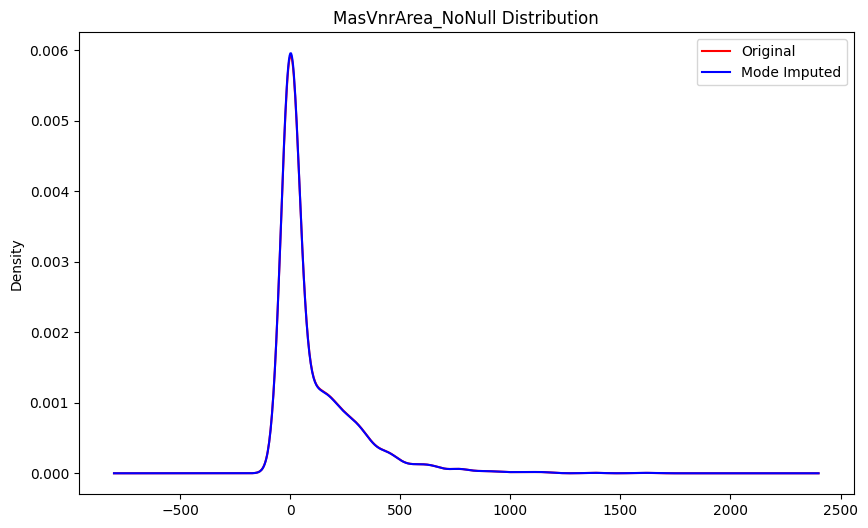

In [87]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
df['MasVnrArea'].plot(kind = 'kde', ax=ax, label='Original', color = 'red')
df['MasVnrArea_NoNull'].plot(kind = 'kde', ax=ax, label='Mode Imputed', color = 'blue')
ax.set_title('MasVnrArea_NoNull Distribution')
ax.legend()
plt.show()

In [88]:
df['MasVnrArea_NoNull'].isnull().sum()

np.int64(0)

In [89]:
df['MasVnrArea_NoNull'].corr(df['SalePrice'])
# 0.4774930470957155 this was MasVnrArea correlation with SalePrice

np.float64(0.47261449900457386)

In [90]:
# Dropping the original MasVnrArea column
df = df.drop(columns='MasVnrArea')

## 13. Electrical

In [91]:
df.isnull().mean().sort_values(ascending=False).head(3) * 100

Electrical    0.068493
MSSubClass    0.000000
Id            0.000000
dtype: float64

In [92]:
df['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [93]:
grouped = df.groupby('Electrical')['SalePrice'].mean()
print(grouped)

# I'm calculating the average sale price for each electrical type.
# SO house with 'More standard electrical type has the highest average sale price.
# so it have a relationship with SalePrice.

Electrical
FuseA    122196.893617
FuseF    107675.444444
FuseP     97333.333333
Mix       67000.000000
SBrkr    186825.113193
Name: SalePrice, dtype: float64


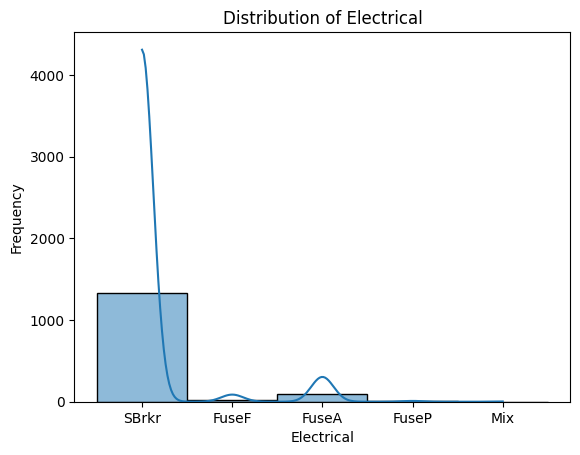

In [94]:
sns.histplot(df['Electrical'], kde=True)
plt.title("Distribution of Electrical")
plt.xlabel("Electrical")
plt.ylabel("Frequency")
plt.show()

In [95]:
# I'm imputing the missing values with 'SBrkr' because it has the highest average sale price.
df['Electrical'] = df['Electrical'].fillna('SBrkr')

In [96]:
df.isnull().mean().sort_values(ascending=False).head(3) * 100

Id            0.0
MSSubClass    0.0
MSZoning      0.0
dtype: float64

In [97]:
null_columns_count = df.isnull().any().sum()
print(f'The number of columns with null values: {null_columns_count}')

The number of columns with null values: 0


In [98]:
# so the number of columns with null values is 0. we have successfully handled all missing values.

# Handling Mixed variable

In [99]:
# function to check for mixed types in a column
def has_mixed_types(col):
    return col.apply(type).nunique() > 1

# Apply it to all columns
mixed_type_columns = df.columns[df.apply(has_mixed_types)]

# Print result
print("Columns with mixed types:")
print(mixed_type_columns.tolist())
print("SUM: ", len(mixed_type_columns))

Columns with mixed types:
[]
SUM:  0


In [100]:
# so after removing the columns with mixed types, we have 0 columns with mixed types.
# so we completed the task of handling mixed types in the dataset.

# Handling duplicate value +
# Inconsistence categorical labels

In [101]:
id_duplicates = df['Id'].duplicated().sum()
print(f"Total number of duplicate rows: {id_duplicates}")

Total number of duplicate rows: 0


In [102]:
# List of all Categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:")
print(categorical_columns)


Categorical columns:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'GarageType_NoNull']


In [103]:
## Function to print unique values for each categorical column

def print_unique_values(df, columns):
    for col in columns:
        print(f"Column: {col}")
        print(df[col].unique())
        print("-" * 40)

# Get all categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Print unique values for each categorical column
print_unique_values(df, categorical_columns)

Column: MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']
----------------------------------------
Column: Street
['Pave' 'Grvl']
----------------------------------------
Column: LotShape
['Reg' 'IR1' 'IR2' 'IR3']
----------------------------------------
Column: LandContour
['Lvl' 'Bnk' 'Low' 'HLS']
----------------------------------------
Column: Utilities
['AllPub' 'NoSeWa']
----------------------------------------
Column: LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
----------------------------------------
Column: LandSlope
['Gtl' 'Mod' 'Sev']
----------------------------------------
Column: Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
----------------------------------------
Column: Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
-------------

In [104]:
# problem 1 solved
# Handling Inconsistence categorical labels
df['MSZoning'] = df['MSZoning'].replace('C (all)', 'C')
df['MSZoning'].unique()

array(['RL', 'RM', 'C', 'FV', 'RH'], dtype=object)

In [105]:
# I checked all categorical columns and there are no more inconsistencies or Dupicate values.
# also there are no extrra spaces.

# Outlier

In [106]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("numerical columns:")
print(numerical_columns)

numerical columns:
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'GarageYrBlt_NoNull', 'MasVnrArea_NoNull']


In [107]:
'''for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, kde=True, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()'''

"for col in numerical_columns:\n    plt.figure(figsize=(6, 4))\n    sns.histplot(data=df, x=col, kde=True, color='blue')\n    plt.title(f'Distribution of {col}')\n    plt.xlabel(col)\n    plt.ylabel('Frequency')\n    plt.tight_layout()\n    plt.show()"

In [108]:
# getting full information about outliers in numerical columns

outlier_info = {}

for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    outlier_info[col] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outlier Count': outliers.shape[0],
        'Outlier Percentage': (outliers.shape[0] / df.shape[0]) * 100,
        'skewness': outliers[col].skew()
    }

# To display the result
import pandas as pd
outlier_summary = pd.DataFrame(outlier_info).T
print(outlier_summary)


                           Q1         Q3       IQR  Lower Bound  Upper Bound  \
Id                     365.75    1095.25    729.50     -728.500     2189.500   
MSSubClass              20.00      70.00     50.00      -55.000      145.000   
LotFrontage             60.00      79.00     19.00       31.500      107.500   
LotArea               7553.50   11601.50   4048.00     1481.500    17673.500   
OverallQual              5.00       7.00      2.00        2.000       10.000   
OverallCond              5.00       6.00      1.00        3.500        7.500   
YearBuilt             1954.00    2000.00     46.00     1885.000     2069.000   
YearRemodAdd          1967.00    2004.00     37.00     1911.500     2059.500   
BsmtFinSF1               0.00     712.25    712.25    -1068.375     1780.625   
BsmtFinSF2               0.00       0.00      0.00        0.000        0.000   
BsmtUnfSF              223.00     808.00    585.00     -654.500     1685.500   
TotalBsmtSF            795.75    1298.25

In [109]:
# decending order of outlier percentage
# so that I can handle the most problematic columns first

outlier_data = []

for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_percentage = (outliers.shape[0] / df.shape[0]) * 100
    shape = outliers.shape[0]
    outlier_data.append(
        {'Column': col,
        'Outlier_Percentage': outliers_percentage,
        'shape': shape
        }
        )

# Create DataFrame and sort
outlier_df = pd.DataFrame(outlier_data)
outlier_df = outlier_df.sort_values('Outlier_Percentage', ascending=False)

# Print results
# Print results
for _, row in outlier_df.iterrows():
    print(f"'{row['Column']}' has {row['Outlier_Percentage']:.2f}% and {row['shape']} outliers")

'EnclosedPorch' has 14.25% and 208 outliers
'BsmtFinSF2' has 11.44% and 167 outliers
'OverallCond' has 8.56% and 125 outliers
'ScreenPorch' has 7.95% and 116 outliers
'LotFrontage' has 7.26% and 106 outliers
'MSSubClass' has 7.05% and 103 outliers
'MasVnrArea_NoNull' has 6.71% and 98 outliers
'BsmtHalfBath' has 5.62% and 82 outliers
'OpenPorchSF' has 5.27% and 77 outliers
'LotArea' has 4.73% and 69 outliers
'KitchenAbvGr' has 4.66% and 68 outliers
'SalePrice' has 4.18% and 61 outliers
'TotalBsmtSF' has 4.18% and 61 outliers
'MiscVal' has 3.56% and 52 outliers
'BedroomAbvGr' has 2.40% and 35 outliers
'WoodDeckSF' has 2.19% and 32 outliers
'GrLivArea' has 2.12% and 31 outliers
'TotRmsAbvGrd' has 2.05% and 30 outliers
'BsmtUnfSF' has 1.99% and 29 outliers
'LowQualFinSF' has 1.78% and 26 outliers
'3SsnPorch' has 1.64% and 24 outliers
'GarageArea' has 1.44% and 21 outliers
'1stFlrSF' has 1.37% and 20 outliers
'YearBuilt' has 0.48% and 7 outliers
'BsmtFinSF1' has 0.48% and 7 outliers
'Firepl

In [110]:
# EnclosedPorch: Enclosed porch area in square feet
# BsmtFinSF2: Type 2 finished square feet
# OverallCond: Rates the overall condition of the house

## 1. EnclosedPorch

In [111]:
df['EnclosedPorch'].unique()

array([  0, 272, 228, 205, 176,  87, 172, 102,  37, 144,  64, 114, 202,
       128, 156,  44,  77, 192, 140, 180, 183,  39, 184,  40, 552,  30,
       126,  96,  60, 150, 120, 112, 252,  52, 224, 234, 244, 268, 137,
        24, 108, 294, 177, 218, 242,  91, 160, 130, 169, 105,  34, 248,
       236,  32,  80, 115, 291, 116, 158, 210,  36, 200,  84, 148, 136,
       240,  54, 100, 189, 293, 164, 216, 239,  67,  90,  56, 129,  98,
       143,  70, 386, 154, 185, 134, 196, 264, 275, 230, 254,  68, 194,
       318,  48,  94, 138, 226, 174,  19, 170, 220, 214, 280, 190, 330,
       208, 145, 259,  81,  42, 123, 162, 286, 168,  20, 301, 198, 221,
       212,  50,  99])

In [112]:
df['EnclosedPorch'].value_counts()


EnclosedPorch
0      1252
112      15
96        6
144       5
192       5
       ... 
198       1
221       1
212       1
50        1
99        1
Name: count, Length: 120, dtype: int64

Text(0.5, 1.0, 'Boxplot of EnclosedPorch')

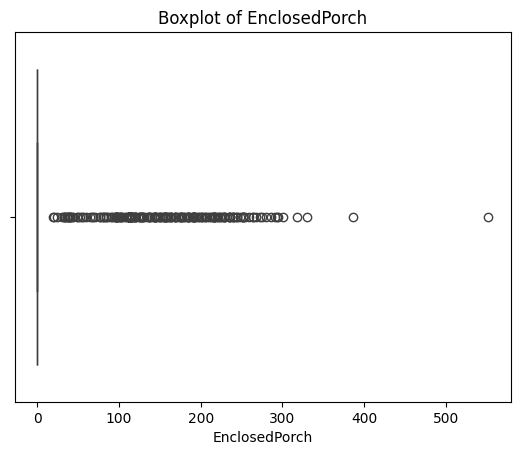

In [113]:
boxplot = sns.boxplot(x=df['EnclosedPorch'])
plt.title('Boxplot of EnclosedPorch')

Text(0.5, 1.0, 'Histogram of EnclosedPorch')

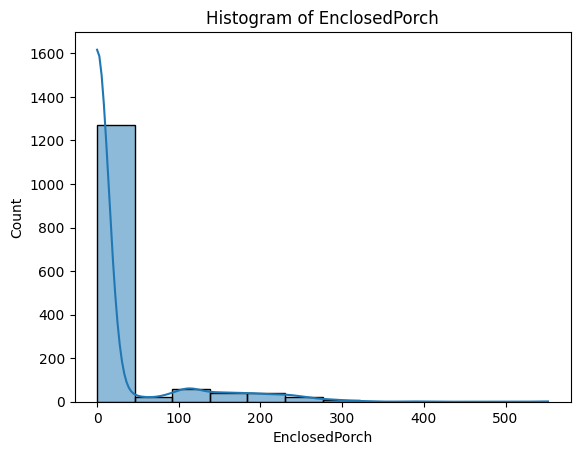

In [114]:
histogram = sns.histplot(df['EnclosedPorch'], kde=True)
plt.title('Histogram of EnclosedPorch')

In [115]:
# so the thing is 0 is not an outlier, it is a valid value.
# so I'm not going to drop it, but I will handle it in feature engineering.

## 2. BsmtFinSF2

In [116]:
df['BsmtFinSF2'].unique()

array([   0,   32,  668,  486,   93,  491,  506,  712,  362,   41,  169,
        869,  150,  670,   28, 1080,  181,  768,  215,  374,  208,  441,
        184,  279,  306,  180,  580,  690,  692,  228,  125, 1063,  620,
        175,  820, 1474,  264,  479,  147,  232,  380,  544,  294,  258,
        121,  391,  531,  344,  539,  713,  210,  311, 1120,  165,  532,
         96,  495,  174, 1127,  139,  202,  645,  123,  551,  219,  606,
        612,  480,  182,  132,  336,  468,  287,   35,  499,  723,  119,
         40,  117,  239,   80,  472,   64, 1057,  127,  630,  128,  377,
        764,  345, 1085,  435,  823,  500,  290,  324,  634,  411,  841,
       1061,  466,  396,  354,  149,  193,  273,  465,  400,  682,  557,
        230,  106,  791,  240,  547,  469,  177,  108,  600,  492,  211,
        168, 1031,  438,  375,  144,   81,  906,  608,  276,  661,   68,
        173,  972,  105,  420,  546,  334,  352,  872,  110,  627,  163,
       1029])

In [117]:
df['BsmtFinSF2'].value_counts()

BsmtFinSF2
0       1293
180        5
374        3
93         2
287        2
        ... 
872        1
110        1
627        1
163        1
1029       1
Name: count, Length: 144, dtype: int64

Text(0.5, 1.0, 'Histogram of BsmtFinSF2')

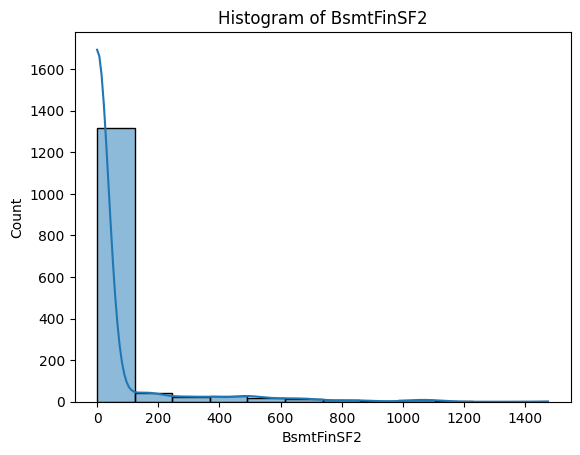

In [118]:
histogram = sns.histplot(df['BsmtFinSF2'], kde=True)
plt.title('Histogram of BsmtFinSF2')

In [119]:
# so here also 0 is not an outlier, it is a valid value.
# so I'm not going to drop it, but I will handle it in feature engineering.

## 3. OverallCond

In [120]:
sorted(df['OverallCond'].unique())

[np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9)]

In [121]:
df['OverallCond'].value_counts()

OverallCond
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: count, dtype: int64

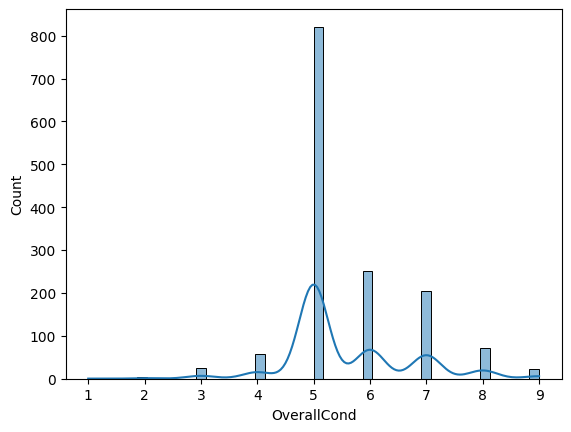

In [122]:
histogram = sns.histplot(df['OverallCond'], kde=True)

In [123]:
# so the dont have any outliers, they represent the overall condition of the house.
# and there are no unwanted values.
# so I'm not going to drop it, but I will handle it in feature engineering.

## 4. ScreenPorch

In [124]:
df['ScreenPorch'].unique()

array([  0, 176, 198, 291, 252,  99, 184, 168, 130, 142, 192, 410, 224,
       266, 170, 154, 153, 144, 128, 259, 160, 271, 234, 374, 185, 182,
        90, 396, 140, 276, 180, 161, 145, 200, 122,  95, 120,  60, 126,
       189, 260, 147, 385, 287, 156, 100, 216, 210, 197, 204, 225, 152,
       175, 312, 222, 265, 322, 190, 233,  63,  53, 143, 273, 288, 263,
        80, 163, 116, 480, 178, 440, 155, 220, 119, 165,  40])

In [125]:
df['ScreenPorch'].value_counts()

ScreenPorch
0      1344
192       6
120       5
224       5
189       4
       ... 
155       1
220       1
119       1
165       1
40        1
Name: count, Length: 76, dtype: int64

In [126]:
# so ScreenPorch 0 is not an outlier, it is a valid value.
# so I'm not going to drop it, but I will handle it in feature engineering.

## 5. LotFrontage
- LotFrontage: Linear feet of street connected to property

In [127]:
df.shape

(1460, 75)

In [128]:
df['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  69.,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,  77.,
        64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,  92.,
       134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,  67.,
        83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,  87.,
       116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,  38.,
       109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144., 114.,
       128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,  46.])

Text(0.5, 1.0, 'Histogram of LotFrontage')

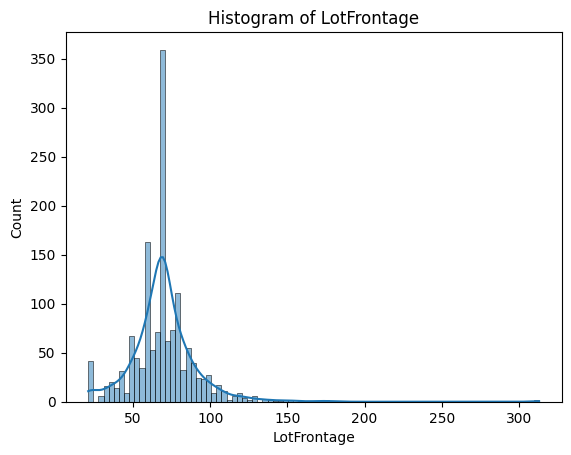

In [129]:
histogram = sns.histplot(df['LotFrontage'], kde=True)
plt.title('Histogram of LotFrontage')

In [130]:
# Define a threshold for identifying outliers
# A common choice is 2.5 or 3 standard deviations from the mean


# Compute mean and standard deviation of LotFrontage
mean_val = df['LotFrontage'].mean()
std_val = df['LotFrontage'].std()

# Compute z-scores of LotFrontage
df['z_score'] = (df['LotFrontage'] - mean_val) / std_val

# I'm using 2.5 here for a more lenient threshold
threshold = 2.5
df['is_outlier'] = df['z_score'].abs() > threshold

print(df['is_outlier'].value_counts())


is_outlier
False    1436
True       24
Name: count, dtype: int64


In [131]:
# Parameters
threshold = 2.5

# Mean & Std
mean_val = df['LotFrontage'].mean()
std_val = df['LotFrontage'].std()

# Limits
upper_limit = mean_val + threshold * std_val
lower_limit = mean_val - threshold * std_val

# Cap the values
df['LotFrontage_capped'] = np.clip(df['LotFrontage'], lower_limit, upper_limit)

In [132]:
df['LotFrontage_capped']

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage_capped, Length: 1460, dtype: float64

In [133]:
df.shape

(1460, 78)

In [134]:
df.drop(columns=['z_score', 'is_outlier', 'LotFrontage'], inplace=True)

In [135]:
# do not check LotFrontage_capped z_score because it is will give false positives
# because we capped the values, so the z_score will be 0 for all capped values

Text(0.5, 1.0, 'Histogram of LotFrontage')

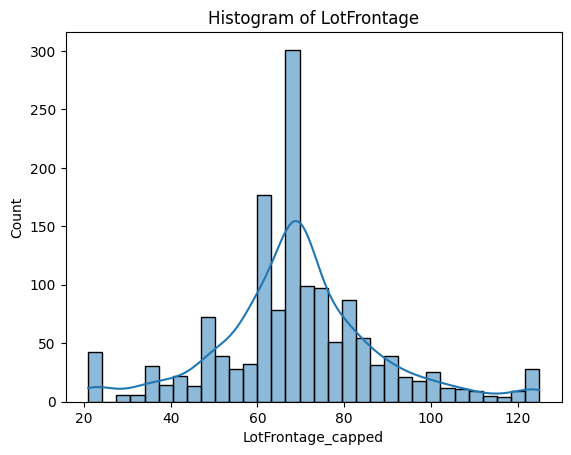

In [136]:
histogram = sns.histplot(df['LotFrontage_capped'], kde=True)
plt.title('Histogram of LotFrontage')

In [137]:
# wow nice capping worked well, the distribution looks much better now.

In [138]:
df.shape

(1460, 75)

## 6. MSSubClass, MasVnrArea_NoNull, BsmtHalfBath

In [139]:
df['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40])

In [140]:
df['MasVnrArea_NoNull'].unique()

array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.400e+02,
       2.860e+02, 3.060e+02, 2.120e+02, 1.800e+02, 3.800e+02, 2.810e+02,
       6.400e+02, 2.000e+02, 2.460e+02, 1.320e+02, 6.500e+02, 1.010e+02,
       4.120e+02, 2.720e+02, 4.560e+02, 1.031e+03, 1.780e+02, 5.730e+02,
       3.440e+02, 2.870e+02, 1.670e+02, 1.115e+03, 4.000e+01, 1.040e+02,
       5.760e+02, 4.430e+02, 4.680e+02, 6.600e+01, 2.200e+01, 2.840e+02,
       7.600e+01, 2.030e+02, 6.800e+01, 1.830e+02, 4.800e+01, 2.800e+01,
       3.360e+02, 6.000e+02, 7.680e+02, 4.800e+02, 2.200e+02, 1.840e+02,
       1.129e+03, 1.160e+02, 1.350e+02, 2.660e+02, 8.500e+01, 3.090e+02,
       1.360e+02, 2.880e+02, 7.000e+01, 3.200e+02, 5.000e+01, 1.200e+02,
       4.360e+02, 2.520e+02, 8.400e+01, 6.640e+02, 2.260e+02, 3.000e+02,
       6.530e+02, 1.120e+02, 4.910e+02, 2.680e+02, 7.480e+02, 9.800e+01,
       2.750e+02, 1.380e+02, 2.050e+02, 2.620e+02, 1.280e+02, 2.600e+02,
       1.530e+02, 6.400e+01, 3.120e+02, 1.600e+01, 

In [141]:
df['BsmtHalfBath'].unique()

array([0, 1, 2])

## 7. OpenPorchSF

In [142]:
df['OpenPorchSF'].unique()

array([ 61,   0,  42,  35,  84,  30,  57, 204,   4,  21,  33, 213, 112,
       102, 154, 159, 110,  90,  56,  32,  50, 258,  54,  65,  38,  47,
        64,  52, 138, 104,  82,  43, 146,  75,  72,  70,  49,  11,  36,
       151,  29,  94, 101, 199,  99, 234, 162,  63,  68,  46,  45, 122,
       184, 120,  20,  24, 130, 205, 108,  80,  66,  48,  25,  96, 111,
       106,  40, 114,   8, 136, 132,  62, 228,  60, 238, 260,  27,  74,
        16, 198,  26,  83,  34,  55,  22,  98, 172, 119, 208, 105, 140,
       168,  28,  39, 148,  12,  51, 150, 117, 250,  10,  81,  44, 144,
       175, 195, 128,  76,  17,  59, 214, 121,  53, 231, 134, 192, 123,
        78, 187,  85, 133, 176, 113, 137, 125, 523, 100, 285,  88, 406,
       155,  73, 182, 502, 274, 158, 142, 243, 235, 312, 124, 267, 265,
        87, 288,  23, 152, 341, 116, 160, 174, 247, 291,  18, 170, 156,
       166, 129, 418, 240,  77, 364, 188, 207,  67,  69, 131, 191,  41,
       118, 252, 189, 282, 135,  95, 224, 169, 319,  58,  93, 24

Text(0.5, 1.0, 'Histogram of OpenPorchSF')

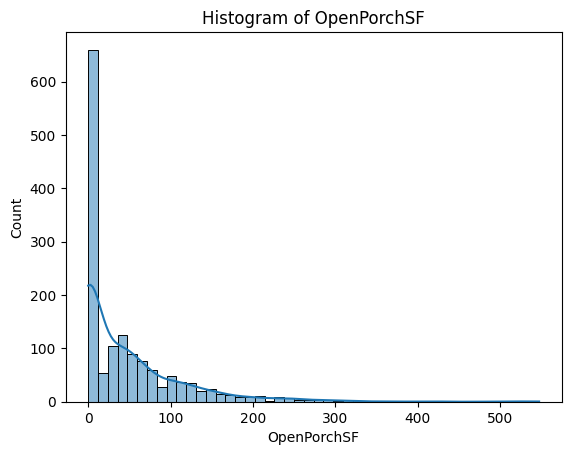

In [143]:
histogram = sns.histplot(df['OpenPorchSF'], kde=True)
plt.title('Histogram of OpenPorchSF')

In [144]:
# I don't think it need to be capping

## 8. LotArea


In [145]:
df['LotArea'].unique()

array([ 8450,  9600, 11250, ..., 17217, 13175,  9717])

Text(0.5, 1.0, 'Histogram of LotArea')

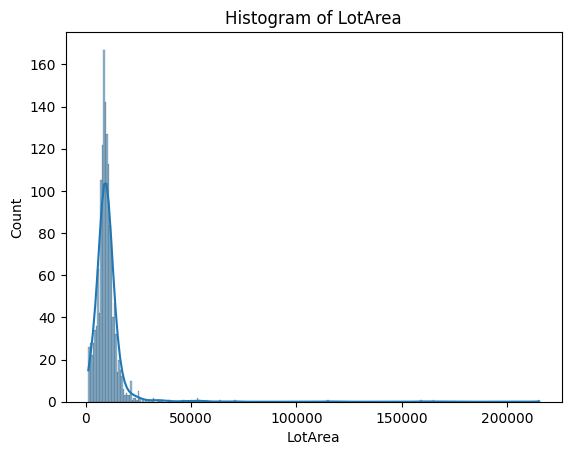

In [146]:
histogram = sns.histplot(df['LotArea'], kde=True)
plt.title('Histogram of LotArea')

In [147]:
# Compute mean and standard deviation of LotFrontage
mean_val = df['LotArea'].mean()
std_val = df['LotArea'].std()

# Compute z-scores of LotFrontage
df['z_score'] = (df['LotArea'] - mean_val) / std_val

# I'm using 2.5 here for a more lenient threshold
threshold = 2.5
df['is_outlier'] = df['z_score'].abs() > threshold

print(df['is_outlier'].value_counts())


is_outlier
False    1443
True       17
Name: count, dtype: int64


In [148]:
# Parameters
threshold = 2.5

# Mean & Std
mean_val = df['LotArea'].mean()
std_val = df['LotArea'].std()

# Limits
upper_limit = mean_val + threshold * std_val
lower_limit = mean_val - threshold * std_val

# Cap the values
df['LotArea_capped'] = np.clip(df['LotArea'], lower_limit, upper_limit)

In [149]:
df['LotArea_capped']

0        8450.0
1        9600.0
2       11250.0
3        9550.0
4       14260.0
         ...   
1455     7917.0
1456    13175.0
1457     9042.0
1458     9717.0
1459     9937.0
Name: LotArea_capped, Length: 1460, dtype: float64

In [150]:
df.shape

(1460, 78)

In [151]:
df.drop(columns=['z_score', 'is_outlier', 'LotArea'], inplace=True)

In [152]:
df.shape

(1460, 75)

Text(0.5, 1.0, 'Histogram of LotArea_capped')

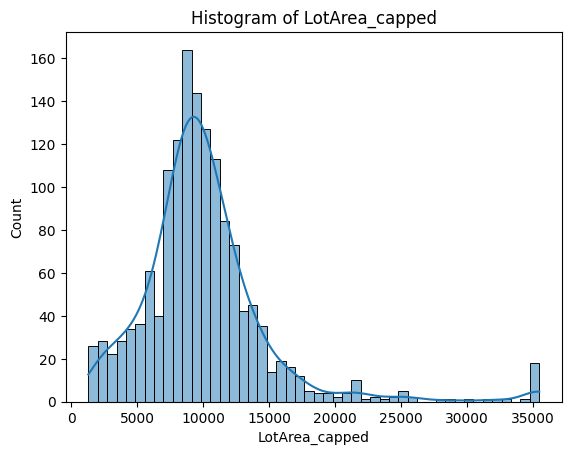

In [153]:
histogram = sns.histplot(df['LotArea_capped'], kde=True)
plt.title('Histogram of LotArea_capped')

In [154]:
# it looks nice

## 9. TotalBsmtSF

In [155]:
df['TotalBsmtSF'].unique()

array([ 856, 1262,  920,  756, 1145,  796, 1686, 1107,  952,  991, 1040,
       1175,  912, 1494, 1253,  832, 1004,    0, 1114, 1029, 1158,  637,
       1777, 1060, 1566,  900, 1704, 1484,  520,  649, 1228, 1234, 1398,
       1561, 1117, 1097, 1297, 1057, 1088, 1350,  840,  938, 1150, 1752,
       1434, 1656,  736,  955,  794,  816, 1842,  384, 1425,  970,  860,
       1410,  780,  530, 1370,  576, 1143, 1947, 1453,  747, 1304, 2223,
        845, 1086,  462,  672, 1768,  440,  896, 1237, 1563, 1065, 1288,
        684,  612, 1013,  990, 1235,  876, 1214,  824,  680, 1588,  960,
        458,  950, 1610,  741, 1226, 1053,  641,  789,  793, 1844,  994,
       1264, 1809, 1028,  729, 1092, 1125, 1673,  728,  732, 1080, 1199,
       1362, 1078,  660, 1008,  924,  992, 1063, 1267, 1461, 1907,  928,
        864, 1734,  910, 1490, 1728,  715,  884,  969, 1710,  825, 1602,
       1200,  572,  774, 1392, 1232, 1572, 1541,  882, 1149,  644, 1617,
       1582,  720, 1064, 1606, 1202, 1151, 1052, 22

Text(0.5, 1.0, 'Histogram of TotalBsmtSF')

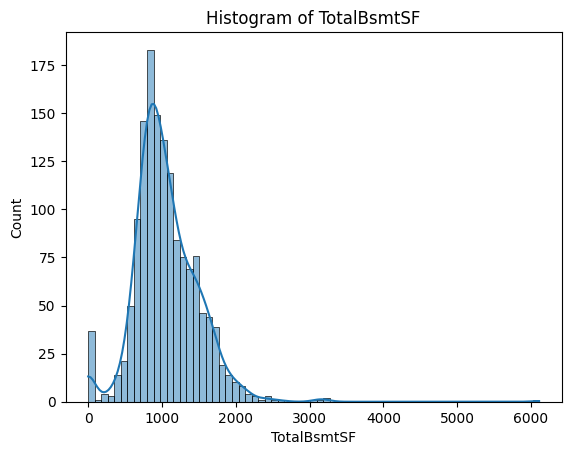

In [156]:
histogram = sns.histplot(df['TotalBsmtSF'], kde=True)
plt.title('Histogram of TotalBsmtSF')

In [157]:
# Compute mean and standard deviation of LotFrontage
mean_val = df['TotalBsmtSF'].mean()
std_val = df['TotalBsmtSF'].std()

# Compute z-scores of LotFrontage
df['z_score'] = (df['TotalBsmtSF'] - mean_val) / std_val

# I'm using 2.5 here for a more lenient threshold
threshold = 2.5
df['is_outlier'] = df['z_score'].abs() > threshold

print(df['is_outlier'].value_counts())

is_outlier
False    1445
True       15
Name: count, dtype: int64


In [158]:
# Parameters
threshold = 2.5

# Mean & Std
mean_val = df['TotalBsmtSF'].mean()
std_val = df['TotalBsmtSF'].std()

# Limits
upper_limit = mean_val + threshold * std_val
lower_limit = mean_val - threshold * std_val

# Cap the values
df['TotalBsmtSF_capped'] = np.clip(df['TotalBsmtSF'], lower_limit, upper_limit)

Text(0.5, 1.0, 'Histogram of TotalBsmtSF_capped')

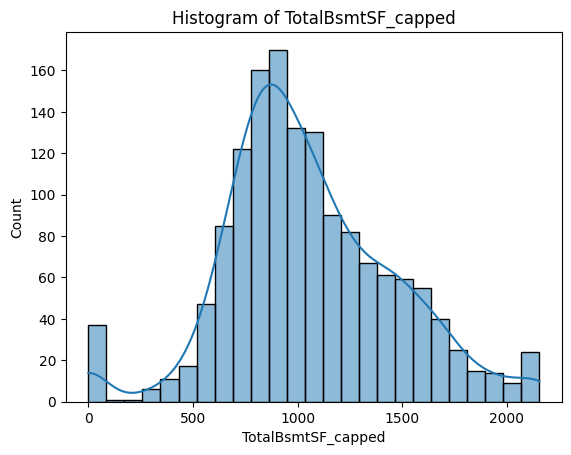

In [159]:
histogram = sns.histplot(df['TotalBsmtSF_capped'], kde=True)
plt.title('Histogram of TotalBsmtSF_capped')

In [160]:
df.drop(columns=['z_score', 'is_outlier', 'TotalBsmtSF'], inplace=True)

In [161]:
df.shape

(1460, 75)

## 10. Handle rest outlier column

In [162]:
df['MiscVal'].unique()

array([    0,   700,   350,   500,   400,   480,   450, 15500,  1200,
         800,  2000,   600,  3500,  1300,    54,   620,   560,  1400,
        8300,  1150,  2500])

In [163]:
df['BedroomAbvGr'].unique()

array([3, 4, 1, 2, 0, 5, 6, 8])

In [164]:
df['WoodDeckSF'].unique()

array([  0, 298, 192,  40, 255, 235,  90, 147, 140, 160,  48, 240, 171,
       100, 406, 222, 288,  49, 203, 113, 392, 145, 196, 168, 112, 106,
       857, 115, 120,  12, 576, 301, 144, 300,  74, 127, 232, 158, 352,
       182, 180, 166, 224,  80, 367,  53, 188, 105,  24,  98, 276, 200,
       409, 239, 400, 476, 178, 574, 237, 210, 441, 116, 280, 104,  87,
       132, 238, 149, 355,  60, 139, 108, 351, 209, 216, 248, 143, 365,
       370,  58, 197, 263, 123, 138, 333, 250, 292,  95, 262,  81, 289,
       124, 172, 110, 208, 468, 256, 302, 190, 340, 233, 184, 201, 142,
       122, 155, 670, 135, 495, 536, 306,  64, 364, 353,  66, 159, 146,
       296, 125,  44, 215, 264,  88,  89,  96, 414, 519, 206, 141, 260,
       324, 156, 220,  38, 261, 126,  85, 466, 270,  78, 169, 320, 268,
        72, 349,  42,  35, 326, 382, 161, 179, 103, 253, 148, 335, 176,
       390, 328, 312, 185, 269, 195,  57, 236, 517, 304, 198, 426,  28,
       316, 322, 307, 257, 219, 416, 344, 380,  68, 114, 327, 16

Text(0.5, 1.0, 'Histogram of WoodDeckSF')

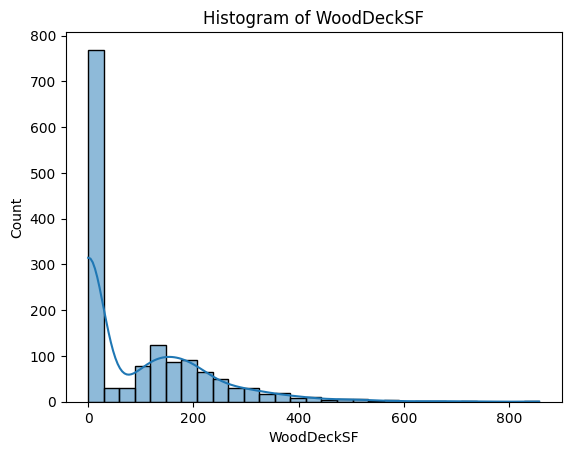

In [165]:
histogram = sns.histplot(df['WoodDeckSF'], kde=True)
plt.title('Histogram of WoodDeckSF')

In [166]:
# this is not normal distrubution so capping is not necessery

In [167]:
df['GrLivArea'].unique()

array([1710, 1262, 1786, 1717, 2198, 1362, 1694, 2090, 1774, 1077, 1040,
       2324,  912, 1494, 1253,  854, 1004, 1296, 1114, 1339, 2376, 1108,
       1795, 1060, 1600,  900, 1704,  520, 1317, 1228, 1234, 1700, 1561,
       2452, 1097, 1297, 1057, 1152, 1324, 1328,  884,  938, 1150, 1752,
       2149, 1656, 1452,  955, 1470, 1176,  816, 1842, 1360, 1425, 1739,
       1720, 2945,  780, 1158, 1111, 1370, 2034, 2473, 2207, 1479,  747,
       2287, 2223,  845, 1718, 1086, 1605,  988,  952, 1285, 1768, 1230,
       2142, 1337, 1563, 1065, 1474, 2417, 1560, 1224, 1526,  990, 1235,
        964, 2291, 1588,  960,  835, 1225, 1610, 1732, 1535, 1226, 1818,
       1992, 1047,  789, 1517, 1844, 1855, 1430, 2696, 2259, 2320, 1458,
       1092, 1125, 3222, 1456, 1123, 1080, 1199, 1586,  754,  958,  840,
       1348, 1053, 2157, 2054, 1327, 1721, 1682, 1214, 1959, 1852, 1764,
        864, 1734, 1385, 1501, 1728, 1709,  875, 2035, 1344,  969, 1993,
       1252, 1200, 1096, 1968, 1947, 2462, 1232, 26

Text(0.5, 1.0, 'Histogram of GrLivArea')

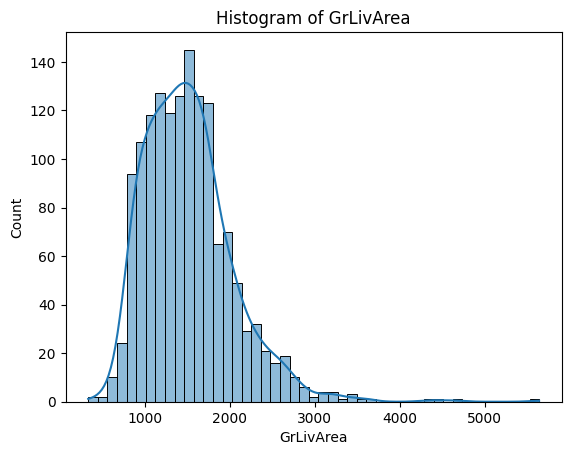

In [168]:
histogram = sns.histplot(df['GrLivArea'], kde=True)
plt.title('Histogram of GrLivArea')

In [169]:
df['TotRmsAbvGrd'].unique()

array([ 8,  6,  7,  9,  5, 11,  4, 10, 12,  3,  2, 14])

In [170]:
df['BsmtUnfSF'].unique()

array([ 150,  284,  434,  540,  490,   64,  317,  216,  952,  140,  134,
        177,  175, 1494,  520,  832,  426,    0,  468,  525, 1158,  637,
       1777,  200,  204, 1566,  180,  486,  207,  649, 1228, 1234,  380,
        408, 1117, 1097,   84,  326,  445,  383,  167,  465, 1296,   83,
       1632,  736,  192,  612,  816,   32,  935,  321,  860, 1410,  148,
        217,  530, 1346,  576,  318, 1143, 1035,  440,  747,  701,  343,
        280,  404,  840,  724,  295, 1768,  448,   36, 1530, 1065,  384,
       1288,  684, 1013,  402,  635,  163,  168,  176,  370,  350,  381,
        410,  741, 1226, 1053,  641,  516,  793, 1139,  550,  905,  104,
        310,  252, 1125,  203,  728,  732,  510,  899, 1362,   30,  958,
        556,  413,  479,  297,  658,  262,  891, 1304,  519, 1907,  336,
        107,  432,  403,  811,  396,  970,  506,  884,  400,  896,  253,
        409,   93, 1200,  572,  774,  769, 1335,  340,  882,  779,  112,
        470,  294, 1686,  360,  441,  354,  700,  7

Text(0.5, 1.0, 'Histogram of BsmtUnfSF')

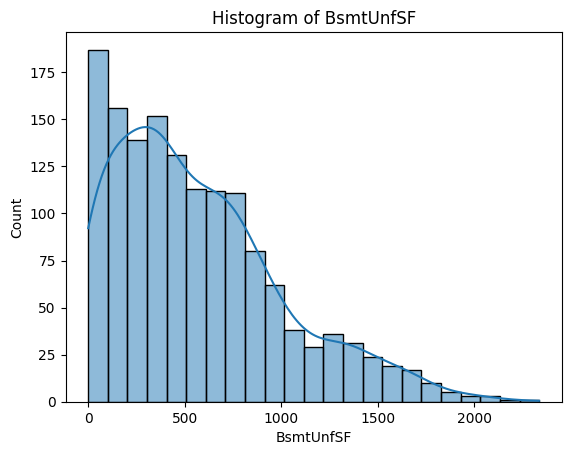

In [171]:
histogram = sns.histplot(df['BsmtUnfSF'], kde=True)
plt.title('Histogram of BsmtUnfSF')

In [172]:
# it has smooth distribution so no need for capping

In [173]:
df['LowQualFinSF'].unique()

array([  0, 360, 513, 234, 528, 572, 144, 392, 371, 390, 420, 473, 156,
       515,  80,  53, 232, 481, 120, 514, 397, 479, 205, 384])

Text(0.5, 1.0, 'Histogram of LowQualFinSF')

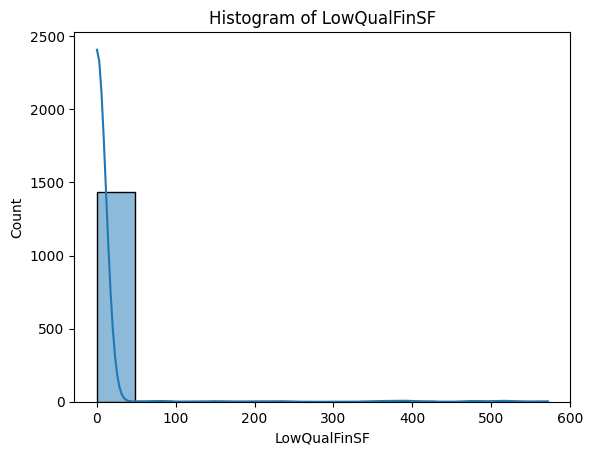

In [174]:
histogram = sns.histplot(df['LowQualFinSF'], kde=True)
plt.title('Histogram of LowQualFinSF')

In [175]:
df['3SsnPorch'].unique()

array([  0, 320, 407, 130, 180, 168, 140, 508, 238, 245, 196, 144, 182,
       162,  23, 216,  96, 153, 290, 304])

Text(0.5, 1.0, 'Histogram of 3SsnPorch')

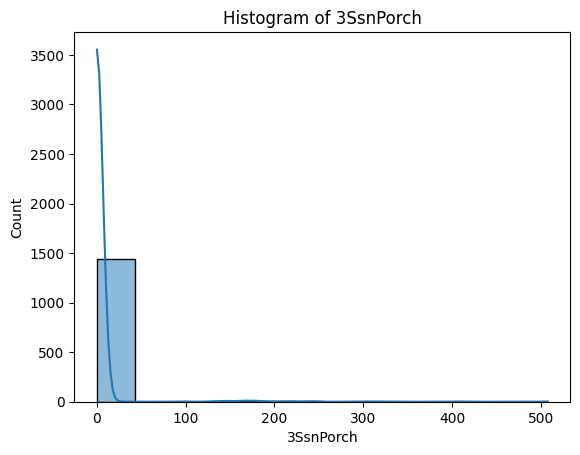

In [176]:
histogram = sns.histplot(df['3SsnPorch'], kde=True)
plt.title('Histogram of 3SsnPorch')

In [177]:
df['GarageArea'].unique()

array([ 548,  460,  608,  642,  836,  480,  636,  484,  468,  205,  384,
        736,  352,  840,  576,  516,  294,  853,  280,  534,  572,  270,
        890,  772,  319,  240,  250,  271,  447,  556,  691,  672,  498,
        246,    0,  440,  308,  504,  300,  670,  826,  386,  388,  528,
        894,  565,  641,  288,  645,  852,  558,  220,  667,  360,  427,
        490,  379,  297,  283,  509,  405,  758,  461,  400,  462,  420,
        432,  506,  684,  472,  366,  476,  410,  740,  648,  273,  546,
        325,  792,  450,  180,  430,  594,  390,  540,  264,  530,  435,
        453,  750,  487,  624,  471,  318,  766,  660,  470,  720,  577,
        380,  434,  866,  495,  564,  312,  625,  680,  678,  726,  532,
        216,  303,  789,  511,  616,  521,  451, 1166,  252,  497,  682,
        666,  786,  795,  856,  473,  398,  500,  349,  454,  644,  299,
        210,  431,  438,  675,  968,  721,  336,  810,  494,  457,  818,
        463,  604,  389,  538,  520,  309,  429,  6

Text(0.5, 1.0, 'Histogram of GarageArea')

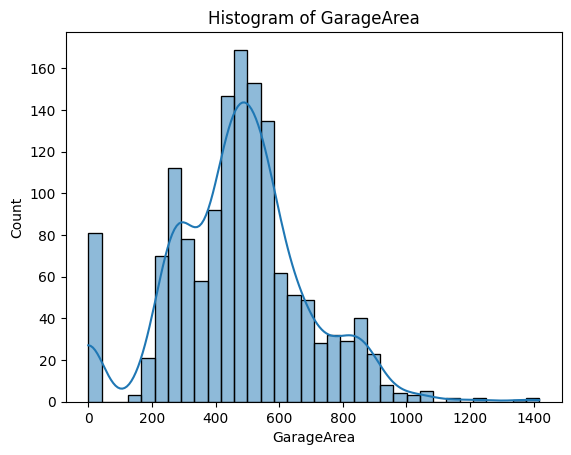

In [178]:
histogram = sns.histplot(df['GarageArea'], kde=True)
plt.title('Histogram of GarageArea')

In [179]:
df['1stFlrSF'].unique()

array([ 856, 1262,  920,  961, 1145,  796, 1694, 1107, 1022, 1077, 1040,
       1182,  912, 1494, 1253,  854, 1004, 1296, 1114, 1339, 1158, 1108,
       1795, 1060, 1600,  900, 1704,  520,  649, 1228, 1234, 1700, 1561,
       1132, 1097, 1297, 1057, 1152, 1324, 1328,  884,  938, 1150, 1752,
       1518, 1656,  736,  955,  794,  816, 1842, 1360, 1425,  983,  860,
       1426,  780,  581, 1370,  902, 1143, 2207, 1479,  747, 1304, 2223,
        845,  885, 1086,  840,  526,  952, 1072, 1768,  682, 1337, 1563,
       1065,  804, 1301,  684,  612, 1013,  990, 1235,  964, 1260,  905,
        680, 1588,  960,  835, 1225, 1610,  977, 1535, 1226, 1053, 1047,
        789,  997, 1844, 1216,  774, 1282, 2259, 1436,  729, 1092, 1125,
       1699,  728,  988,  772, 1080, 1199, 1586,  958,  660, 1327, 1721,
       1682, 1214, 1959,  928,  864, 1734,  910, 1501, 1728,  970,  875,
        896,  969, 1710, 1252, 1200,  572,  991, 1392, 1232, 1572, 1541,
        882, 1149,  808, 1867, 1707, 1064, 1362, 16

Text(0.5, 1.0, 'Histogram of 1stFlrSF')

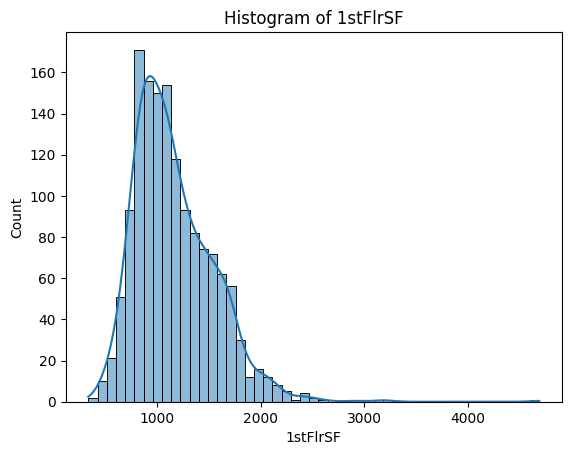

In [180]:
histogram = sns.histplot(df['1stFlrSF'], kde=True)
plt.title('Histogram of 1stFlrSF')

In [181]:
# Compute mean and standard deviation of GrLivArea
mean_val = df['GrLivArea'].mean()
std_val = df['GrLivArea'].std()

# Compute z-scores of LotFrontage
df['z_score'] = (df['GrLivArea'] - mean_val) / std_val

# I'm using 2.5 here for a more lenient threshold
threshold = 2.5
df['is_outlier'] = df['z_score'].abs() > threshold

print(df['is_outlier'].value_counts())

is_outlier
False    1436
True       24
Name: count, dtype: int64


In [182]:
# Parameters
threshold = 2.5

# Mean & Std
mean_val = df['GrLivArea'].mean()
std_val = df['GrLivArea'].std()

# Limits
upper_limit = mean_val + threshold * std_val
lower_limit = mean_val - threshold * std_val

# Cap the values
df['GrLivArea_capped'] = np.clip(df['GrLivArea'], lower_limit, upper_limit)

In [183]:
df.shape

(1460, 78)

In [184]:
df.drop(columns=['z_score', 'is_outlier', 'GrLivArea'], inplace=True)

In [185]:
df.shape

(1460, 75)

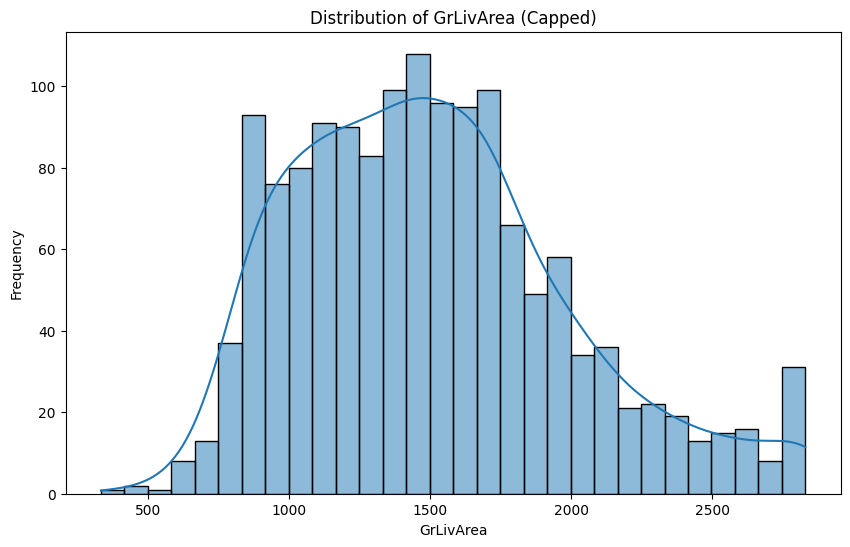

In [186]:
# histogram of GrLivArea
plt.figure(figsize=(10, 6))
sns.histplot(df['GrLivArea_capped'], bins=30, kde=True)
plt.title('Distribution of GrLivArea (Capped)')
plt.xlabel('GrLivArea')
plt.ylabel('Frequency')
plt.show()


In [187]:
# Compute mean and standard deviation of GarageArea
mean_val = df['GarageArea'].mean()
std_val = df['GarageArea'].std()

# Compute z-scores of LotFrontage
df['z_score'] = (df['GarageArea'] - mean_val) / std_val

# I'm using 2.5 here for a more lenient threshold
threshold = 2.5
df['is_outlier'] = df['z_score'].abs() > threshold

print(df['is_outlier'].value_counts())

is_outlier
False    1445
True       15
Name: count, dtype: int64


In [188]:
# Parameters
threshold = 2.5

# Mean & Std
mean_val = df['GarageArea'].mean()
std_val = df['GarageArea'].std()

# Limits
upper_limit = mean_val + threshold * std_val
lower_limit = mean_val - threshold * std_val

# Cap the values
df['GarageArea_capped'] = np.clip(df['GarageArea'], lower_limit, upper_limit)

In [189]:
df.shape

(1460, 78)

In [190]:
df.drop(columns=['z_score', 'is_outlier', 'GarageArea'], inplace=True)
df.shape

(1460, 75)

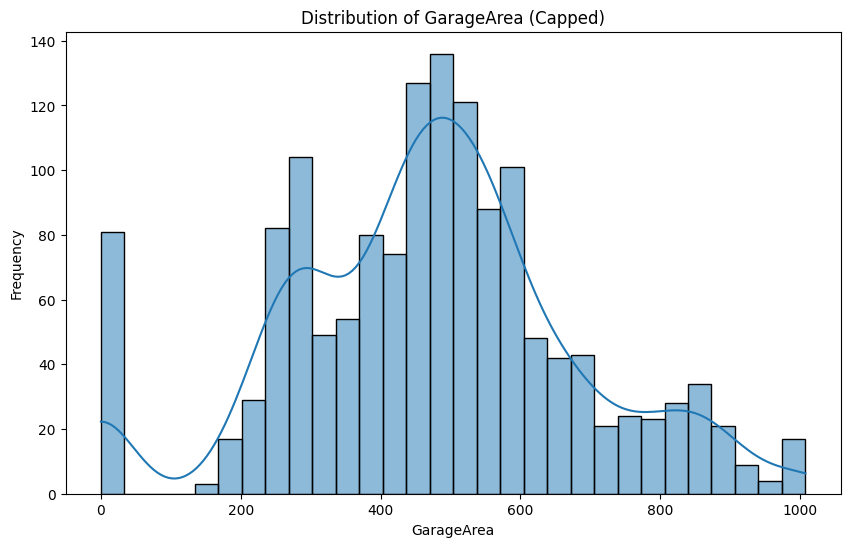

In [191]:
plt.figure(figsize=(10, 6))
sns.histplot(df['GarageArea_capped'], bins=30, kde=True)
plt.title('Distribution of GarageArea (Capped)')
plt.xlabel('GarageArea')
plt.ylabel('Frequency')
plt.show()


In [192]:
# Compute mean and standard deviation of 1stFlrSF
mean_val = df['1stFlrSF'].mean()
std_val = df['1stFlrSF'].std()

# Compute z-scores of LotFrontage
df['z_score'] = (df['1stFlrSF'] - mean_val) / std_val

# I'm using 2.5 here for a more lenient threshold
threshold = 2.5
df['is_outlier'] = df['z_score'].abs() > threshold

print(df['is_outlier'].value_counts())

is_outlier
False    1439
True       21
Name: count, dtype: int64


In [193]:
# Parameters
threshold = 2.5

# Mean & Std
mean_val = df['1stFlrSF'].mean()
std_val = df['1stFlrSF'].std()

# Limits
upper_limit = mean_val + threshold * std_val
lower_limit = mean_val - threshold * std_val

# Cap the values
df['1stFlrSF_capped'] = np.clip(df['1stFlrSF'], lower_limit, upper_limit)

In [194]:
df.shape

(1460, 78)

In [195]:
df.drop(columns=['z_score', 'is_outlier', '1stFlrSF'], inplace=True)
df.shape

(1460, 75)

Text(0.5, 1.0, 'Histogram of 1stFlrSF_capped')

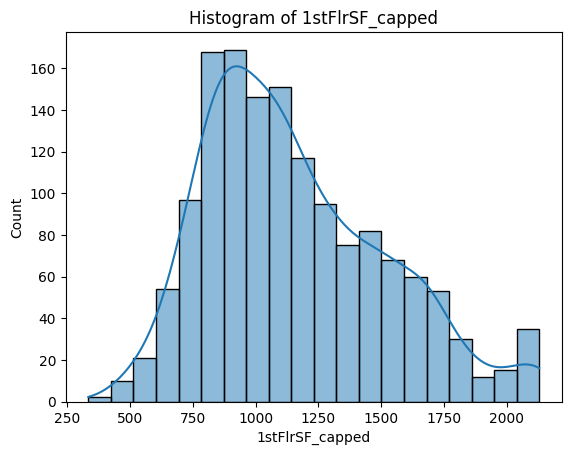

In [196]:
histogram = sns.histplot(df['1stFlrSF_capped'], kde=True)
plt.title('Histogram of 1stFlrSF_capped')

# Selecting Feature

In [197]:
# splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
